## Topic Modeling: to subset 'Positive', 'Neutral', and 'Negative' comments

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [26]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

**Topic Model on Positive Comments**

In [27]:
# Text cleaning prior to topic modeling
words = set(nltk.corpus.words.words())
stop_words = stopwords.words('english')
stop_words += ['poppy','really','like','im','love','theyre','oh','xd','xD','XD','eh','la','ur','']

positive_comments = pd.Series(positive_comments)

# remove all English stopwords
positive_comments = positive_comments.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

# remove more non-English words that were missed
positive_comments = positive_comments.apply(lambda x: ' '.join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


In [28]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.5)

In [29]:
tfidf_pos = tfidf_vectorizer.fit_transform(positive_comments)

In [30]:
n_comp = 30
lsa = TruncatedSVD(n_components=n_comp)

lsa_tfidf_pos = lsa.fit_transform(tfidf_pos)

In [31]:
display_topics(lsa,tfidf_vectorizer.get_feature_names(),20)


Topic  0
great video, video thanks, video thank, wow great, video great, video man, thank great, video amazing, hair great, good job, video beautiful, video good, video channel, great great, thanks great, song great, great job, great song, video song, video usual

Topic  1
good job, song good, job man, good good, great song, wow good, video good, good song, job good, job getting, amazing good, awesome good, job making, good work, great good, million good, job corinne, man good, got good, god bless

Topic  2
best song, great song, song album, best video, song good, song far, song video, song year, song world, god bless, great job, song great, song life, song best, wow best, beautiful song, music video, good work, song sure, good song

Topic  3
great song, song great, song video, song good, great job, song amazing, god bless, beautiful song, thanks great, music video, video great, voice great, thank great, great great, wow great, job great, great voice, song wait, good work, song faith


**Topic Model on Neutral Comments**

In [32]:
# Text cleaning prior to topic modeling
words = set(nltk.corpus.words.words())
stop_words = stopwords.words('english')
stop_words += ['la','hi','oh','hey','el','en','tho','es','ni','gay','','im','ur','la','blah','cad','os','bom','da','cad','demi','eu','um','bom','mas']

neutral_comments = pd.Series(neutral_comments)

# remove all English stopwords
neutral_comments = neutral_comments.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

# remove all non-English words
neutral_comments = neutral_comments.apply(lambda x: ' '.join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))



In [33]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.5)

In [34]:
tfidf_neu = tfidf_vectorizer.fit_transform(neutral_comments)

In [35]:
n_comp = 30
lsa = TruncatedSVD(n_components=n_comp)

lsa_tfidf_neu = lsa.fit_transform(tfidf_neu)

In [36]:
display_topics(lsa,tfidf_vectorizer.get_feature_names(),20)


Topic  0
whats song, song end, song beginning, end video, song background, song used, tell whats, song video, song sing, song start, song trailer, know song, know whats, beginning video, song time, song know, song whats, song min, song beat, song look

Topic  1
dont know, know song, know dont, know say, people dont, know feel, didnt know, know think, know watch, know whats, know real, know video, know watching, know got, know right, really dont, know spell, know believe, know times, know people

Topic  2
make video, need make, think make, video real, long make, video talking, video channel, dont make, come make, video day, video make, video happen, video explaining, video time, video trying, video year, video cleaning, know song, coyote make, video german

Topic  3
didnt know, know thing, know video, know sing, know jimmy, know half, know music, wait didnt, know channel, live didnt, know accent, really didnt, know coming, know trump, jimmy didnt, know cook, know season, know sister, k

**Topic Model on Negative Comments**

In [37]:
# Text cleaning prior to topic modeling
words = set(nltk.corpus.words.words())
stop_words = stopwords.words('english')
stop_words += ['oh','know','yeah','yea','man','guy','like','si','god','damn','look','er','yo','ill','hi','im','ur',
               'hell','yes','po','box','people','love','good','holy','really','','blah','la']

negative_comments = pd.Series(negative_comments)

# remove all English stopwords
negative_comments = negative_comments.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))

# remove all non-English words
negative_comments = negative_comments.apply(lambda x: ' '.join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()))


In [38]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2),  
                                   stop_words=stop_words, 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.5)

In [39]:
tfidf_neg = tfidf_vectorizer.fit_transform(negative_comments)

In [40]:
n_comp = 30
lsa = TruncatedSVD(n_components=n_comp)

lsa_tfidf_neg = lsa.fit_transform(tfidf_neg)


In [41]:
display_topics(lsa,tfidf_vectorizer.get_feature_names(),20)


Topic  0
fake news, news fake, stop fake, fake fake, real fake, news right, fox news, news alive, news false, hate fake, trump fake, show fake, news thing, news alert, say fake, seth fake, liberal fake, bill fake, news fact, news move

Topic  1
everything wrong, wrong movie, wrong please, make everything, please everything, need everything, wrong one, death note, waiting everything, wrong death, still waiting, last knight, wrong last, wrong life, wrong wonder, wrong mean, wrong part, wrong cult, wrong baby, wrong bee

Topic  2
feel bad, bad dont, else feel, anyone else, sad feel, bad sorry, bad person, honestly feel, funny feel, bad eat, always feel, bad got, bad living, bad cant, bad poor, bad still, bad way, bad watching, bad child, bad headphone

Topic  3
made cry, video made, cry much, almost made, song made, cry baby, legit made, literally made, cry hard, cry cant, cant wait, actually made, cry miss, cry lot, cant stop, cry get, scene made, kill made, totally made, cry video

Top

  ## Clustering

In [301]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [316]:
X_pos = StandardScaler().fit_transform(lsa_tfidf_pos)
X_neu = StandardScaler().fit_transform(lsa_tfidf_neu)
X_neg = StandardScaler().fit_transform(lsa_tfidf_neg)

In [303]:
X_pos.shape, X_neu.shape, X_neg.shape

((223438, 30), (196900, 50), (97130, 70))

### K-Means & SSE

**Positive Comments**

In [67]:
k_clusters = range(35,50)
SSEs = []

for k in k_clusters:
    print(f'cluster {k}')
    km = KMeans(n_clusters=k, random_state=28)
    km.fit(X_pos)
    SSEs.append(km.inertia_)

cluster 35
cluster 36
cluster 37
cluster 38
cluster 39
cluster 40
cluster 41
cluster 42
cluster 43
cluster 44
cluster 45
cluster 46
cluster 47
cluster 48
cluster 49


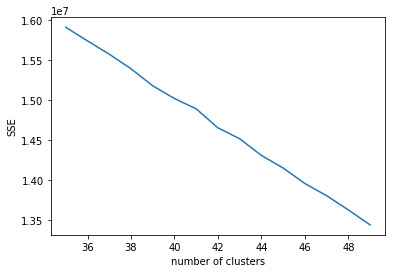

In [68]:
# Already ran cluster numbers 2 - 35 before, and found no "elbow" point. 
#Indicative that there are no good number of clusters.
# Could not run silhoutte score because caused kernel to crash.
plt.plot(k_clusters, SSEs)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

### K-Means & TSNE

**Clustering Positive Comments** to quick check what clusters look like

In [416]:
km = KMeans(n_clusters=30, random_state=28)
pos_km = km.fit_predict(X_pos)

In [411]:
# LSA & TFIDF Positive Comments
tsne = TSNE(n_components=2, random_state=28,verbose=2, perplexity=4.0)
tsne_pos = tsne.fit_transform(X_pos)

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 223438 samples in 19.643s...
[t-SNE] Computed neighbors for 223438 samples in 944.041s...
[t-SNE] Computed conditional probabilities for sample 1000 / 223438
[t-SNE] Computed conditional probabilities for sample 2000 / 223438
[t-SNE] Computed conditional probabilities for sample 3000 / 223438
[t-SNE] Computed conditional probabilities for sample 4000 / 223438
[t-SNE] Computed conditional probabilities for sample 5000 / 223438
[t-SNE] Computed conditional probabilities for sample 6000 / 223438
[t-SNE] Computed conditional probabilities for sample 7000 / 223438
[t-SNE] Computed conditional probabilities for sample 8000 / 223438
[t-SNE] Computed conditional probabilities for sample 9000 / 223438
[t-SNE] Computed conditional probabilities for sample 10000 / 223438
[t-SNE] Computed conditional probabilities for sample 11000 / 223438
[t-SNE] Computed conditional probabilities for sample 12000 / 223438
[t-SNE] Computed conditional prob

[t-SNE] Computed conditional probabilities for sample 123000 / 223438
[t-SNE] Computed conditional probabilities for sample 124000 / 223438
[t-SNE] Computed conditional probabilities for sample 125000 / 223438
[t-SNE] Computed conditional probabilities for sample 126000 / 223438
[t-SNE] Computed conditional probabilities for sample 127000 / 223438
[t-SNE] Computed conditional probabilities for sample 128000 / 223438
[t-SNE] Computed conditional probabilities for sample 129000 / 223438
[t-SNE] Computed conditional probabilities for sample 130000 / 223438
[t-SNE] Computed conditional probabilities for sample 131000 / 223438
[t-SNE] Computed conditional probabilities for sample 132000 / 223438
[t-SNE] Computed conditional probabilities for sample 133000 / 223438
[t-SNE] Computed conditional probabilities for sample 134000 / 223438
[t-SNE] Computed conditional probabilities for sample 135000 / 223438
[t-SNE] Computed conditional probabilities for sample 136000 / 223438
[t-SNE] Computed con

[t-SNE] Iteration 550: error = 7.4169993, gradient norm = 0.0008111 (50 iterations in 764.962s)
[t-SNE] Iteration 600: error = 7.2128444, gradient norm = 0.0012353 (50 iterations in 1174.174s)
[t-SNE] Iteration 650: error = 6.7893219, gradient norm = 0.0017065 (50 iterations in 1195.823s)
[t-SNE] Iteration 700: error = 6.5879407, gradient norm = 0.0004271 (50 iterations in 324.748s)
[t-SNE] Iteration 750: error = 6.4833350, gradient norm = 0.0001517 (50 iterations in 427.622s)
[t-SNE] Iteration 800: error = 6.3849063, gradient norm = 0.0001361 (50 iterations in 440.712s)
[t-SNE] Iteration 850: error = 6.2951999, gradient norm = 0.0001241 (50 iterations in 405.204s)
[t-SNE] Iteration 900: error = 6.2107306, gradient norm = 0.0001144 (50 iterations in 400.948s)
[t-SNE] Iteration 950: error = 6.1109047, gradient norm = 0.0001061 (50 iterations in 428.321s)
[t-SNE] Iteration 1000: error = 6.0359735, gradient norm = 0.0000990 (50 iterations in 395.560s)
[t-SNE] Error after 1000 iterations: 

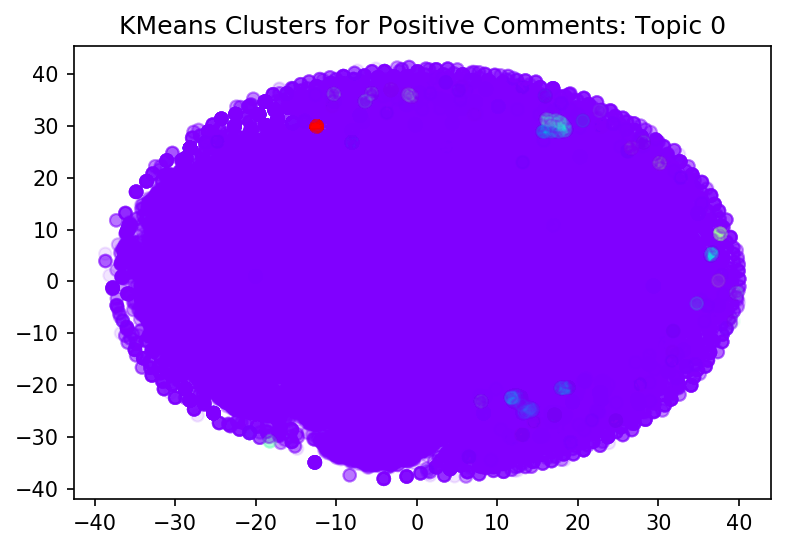

In [467]:
# There are no definitive clusters, and this is the same for neutral and negative comments.

for topic in range(0,1):

    plt.figure(dpi=150)
    plt.scatter(tsne_pos[:,0],tsne_pos[:,1], c=X_pos[:,topic], cmap=plt.cm.rainbow, alpha=0.1)
    #plt.scatter(tsne_pos[:,0],tsne_pos[:,1], c=km.labels_, cmap=plt.cm.rainbow, alpha=0.1)
    plt.title(f'KMeans Clusters for Positive Comments: Topic {topic}')

    plt.show()

In [436]:
# Number of times a topic space was plotted in the K-Means TSNE space

pos_topics_dict = defaultdict(int)
for i,v in enumerate(km.labels_):
    pos_topics_dict[v] += 1
    
sorted(pos_topics_dict.items())

[(0, 215706),
 (1, 160),
 (2, 177),
 (3, 243),
 (4, 162),
 (5, 142),
 (6, 141),
 (7, 231),
 (8, 256),
 (9, 145),
 (10, 207),
 (11, 191),
 (12, 120),
 (13, 148),
 (14, 225),
 (15, 154),
 (16, 170),
 (17, 217),
 (18, 130),
 (19, 458),
 (20, 431),
 (21, 429),
 (22, 299),
 (23, 318),
 (24, 253),
 (25, 427),
 (26, 189),
 (27, 376),
 (28, 273),
 (29, 1060)]